Research Questions_Patrick Feng：

－Under Regular season, what the overall distribution of raptor_onoff_offense is.

－Under Regular season, what the distribution of raptor_onoff_offense in difference ranges is.

－Under Regular season, how the average of each group’s score reflects team members performance.

－Under Regular season, what the distribution of all team members average onoff_offense is.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_function1 as fun

In [74]:
df = pd.read_csv("latest_RAPTOR_by_team.csv")
df

,player_name,player_id,season,season_type,team,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Precious Achiuwa,achiupr01,2021,PO,MIA,24,12,-20.130150,13.445869,-6.684281,...,-19.524216,16.885365,-2.638851,0.000721,0.000000,0.000721,-14.239813,7.007386,-7.232427,2.725036
1,Precious Achiuwa,achiupr01,2021,RS,MIA,1557,737,-3.876227,1.172972,-2.703254,...,-4.113660,0.709264,-3.404396,-0.246776,-0.246776,0.000000,-3.657064,0.374133,-3.282930,0.292227
2,Jaylen Adams,adamsja01,2021,RS,MIL,41,18,-13.078112,-3.298021,-16.376133,...,-16.826146,-1.405129,-18.231275,-0.139591,-0.139591,0.000000,-12.863840,-4.114459,-16.978299,-1.834433
3,Steven Adams,adamsst01,2021,RS,NOP,3313,1605,-1.463698,2.084763,0.621065,...,-0.542297,1.044021,0.501724,2.630392,2.630392,0.000000,-0.728367,1.333237,0.604871,-1.226775
4,Bam Adebayo,adebaba01,2021,PO,MIA,293,136,-4.199527,-0.745652,-4.945179,...,-3.965209,1.679654,-2.285555,0.033852,0.000000,0.033852,-3.413399,1.575706,-1.837693,1.814533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,Trae Young,youngtr01,2021,PO,ATL,1241,603,6.289696,-4.892762,1.396935,...,6.382340,-4.591438,1.790902,1.481875,0.000000,1.481875,9.627494,-5.119280,4.508214,2.794651
861,Trae Young,youngtr01,2021,RS,ATL,4449,2125,5.431654,-3.849879,1.581774,...,5.981243,-3.770601,2.210642,5.481497,5.481497,0.000000,5.723341,-4.382859,1.340482,1.939338
862,Cody Zeller,zelleco01,2021,RS,CHA,2113,1005,-0.658811,1.634766,0.975955,...,-0.135061,1.179117,1.044056,1.950657,1.950657,0.000000,-0.412836,1.035134,0.622298,0.272562
863,Ivica Zubac,zubaciv01,2021,PO,LAC,590,301,-0.610172,3.128919,2.518747,...,-2.056054,2.840494,0.784440,0.556697,0.000000,0.556697,-2.104796,2.298023,0.193227,-0.544855


In [75]:
print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)

Number of rows and columns respectively: (865, 23)
Columns in the dataset: Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')


In [76]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
raptor_box_offense,865.0,-1.190280,5.029161,-46.708724,-2.690118,-0.878361,1.052860,25.867967
raptor_box_defense,865.0,-0.452295,5.073575,-25.382776,-2.244035,-0.334633,1.589149,66.957703
raptor_box_total,865.0,-1.642575,7.526838,-62.219863,-4.002939,-0.802503,1.754482,67.932330
raptor_onoff_offense,865.0,-2.544279,8.402711,-69.051553,-5.120859,-1.362247,1.629285,28.120957
raptor_onoff_defense,865.0,1.036961,8.677396,-52.889719,-2.148888,0.351031,3.185249,65.729833
raptor_onoff_total,865.0,-1.507318,10.583814,-88.047853,-5.202733,-0.874476,2.719564,55.960874
raptor_offense,865.0,-1.553084,5.329365,-43.366145,-3.123756,-0.982071,0.925080,22.564146
raptor_defense,865.0,-0.165898,5.397463,-30.938383,-2.091871,-0.131748,1.899592,71.024801
raptor_total,865.0,-1.718982,7.758748,-63.749646,-4.267638,-0.947591,1.790902,68.268286
war_total,865.0,0.963499,1.963746,-4.747338,-0.085045,0.219487,1.480337,15.756031


In [77]:
df.describe(include='object').T

,count,unique,top,freq
player_name,865,540,Blake Griffin,3
player_id,865,540,griffbl01,3
season_type,865,2,RS,626
team,865,30,BRK,42


In [78]:
df_cleaned = df.dropna(axis=0)
df_cleaned.shape

(865, 23)

In [79]:
#select useful columns
df_selected = df_cleaned.loc[0:,["player_name","season_type",'team','raptor_onoff_offense','raptor_onoff_defense','raptor_onoff_total']]
df_selected

,player_name,season_type,team,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Precious Achiuwa,PO,MIA,-12.897609,25.766232,12.868623
1,Precious Achiuwa,RS,MIA,-3.914412,-1.331056,-5.245468
2,Jaylen Adams,RS,MIL,-26.638723,7.257894,-19.380829
3,Steven Adams,RS,NOP,3.476686,-3.625787,-0.149101
4,Bam Adebayo,PO,MIA,-2.739389,11.060139,8.320750
...,...,...,...,...,...,...
860,Trae Young,PO,ATL,4.288689,-2.046628,2.242060
861,Trae Young,RS,ATL,6.509911,-2.413269,4.096641
862,Cody Zeller,RS,CHA,1.970177,-1.109227,0.860949
863,Ivica Zubac,PO,LAC,-6.870858,0.848330,-6.022529


In [80]:
df_selected = fun.specify(df_selected, "season_type", 'RS')
df_selected

,player_name,season_type,team,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
1,Precious Achiuwa,RS,MIA,-3.914412,-1.331056,-5.245468
2,Jaylen Adams,RS,MIL,-26.638723,7.257894,-19.380829
3,Steven Adams,RS,NOP,3.476686,-3.625787,-0.149101
5,Bam Adebayo,RS,MIA,0.821585,0.139740,0.961325
6,LaMarcus Aldridge,RS,SAS,-1.886924,-2.351193,-4.238117
...,...,...,...,...,...,...
858,Delon Wright,RS,DET,1.915062,-0.396423,1.518639
859,Thaddeus Young,RS,CHI,7.684076,0.858760,8.542836
861,Trae Young,RS,ATL,6.509911,-2.413269,4.096641
862,Cody Zeller,RS,CHA,1.970177,-1.109227,0.860949


-1.2774113946311272

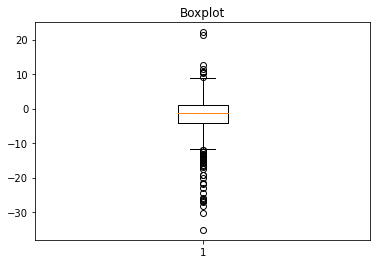

In [81]:
#Visualization 1
onoff_offense = fun.select(df_selected,'raptor_onoff_offense')
graph1 = plt.boxplot(onoff_offense)
plt.title("Boxplot")
np.median(onoff_offense)

According to the graph, there are a great number of outliers. And the median score for raptor_onoff_offense is about -1.277.

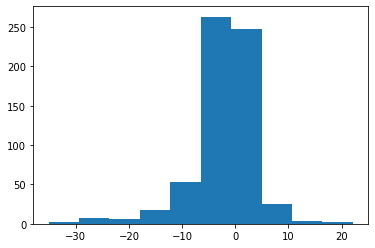

In [82]:
#Visualization 2
graph2 = plt.hist(onoff_offense)

The majority of team members’ raptor_onoff_offense scores are mainly distributed in two ranges around 0.

In [83]:
df1 = df_selected.groupby('team', as_index=False).mean()
df1

,team,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,ATL,-1.985181,-0.242952,-2.228133
1,BOS,-1.494755,0.608576,-0.886179
2,BRK,-1.234759,-0.359847,-1.594607
3,CHA,-3.640749,-0.285552,-3.926301
4,CHI,-1.136816,2.849546,1.712730
5,CLE,-3.142038,0.350206,-2.791832
6,DAL,-2.817197,1.121609,-1.695588
7,DEN,-1.423649,-0.191198,-1.614848
8,DET,-0.984732,-0.734695,-1.719426
9,GSW,-2.001456,-0.858365,-2.859821


Text(0.5, 1.0, 'Boxplot')

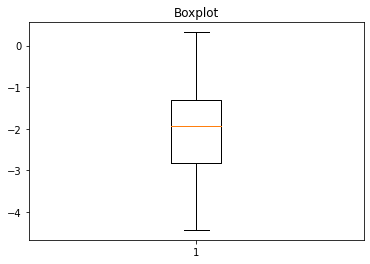

In [84]:
#Visualization 3
onoff_offense2 = fun.select(df1,'raptor_onoff_offense')
graph3 = plt.boxplot(onoff_offense2)
plt.title("Boxplot")

The average of each group’s score is mainly distributed around -2.

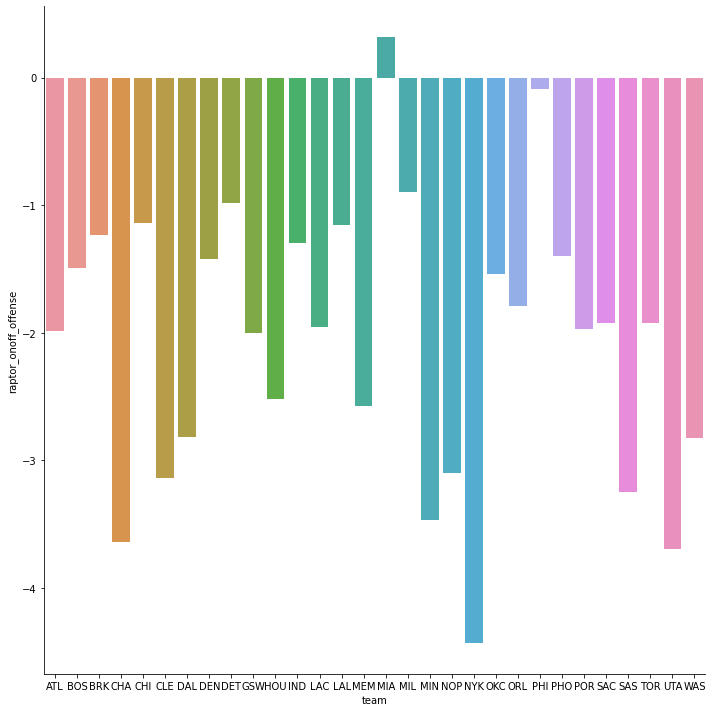

In [85]:
#Visualization 4
graph4 = sns.catplot(x="team",y="raptor_onoff_offense",data = df1,kind ="bar",height=10)

Only the group MIA has the positive team member average onoff_offense score during regular season.